In [3]:
from measures import run_measure
from graphs import graph_loader

graph = graph_loader(graph_type='BA', n=1000, seed=1)

spectral_radius = run_measure(graph, measure='spectral_radius')
print("Spectral radius:", spectral_radius)

effective_resistance = run_measure(graph, measure='effective_resistance')
print("Effective resistance:", effective_resistance)

Spectral radius: 13.67
Effective resistance: 284364.09


Link to the paper:
https://arxiv.org/pdf/2006.05648.pdf

Running simulation 1 times


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

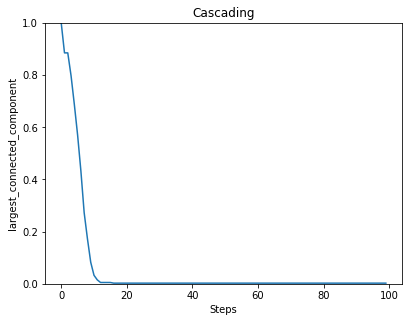

<Figure size 432x288 with 0 Axes>

In [1]:
from cascading import Cascading
from graphs import graph_loader

graph = graph_loader('BA', n=400, seed=1)

params = {
    'runs': 1,
    'steps': 100,
    'seed': 1,

    'l': 0.8,
    'r': 0.2,
    'c': int(0.1 * len(graph)),

    'k_a': 30,
    'attack': 'rb_node',
    'attack_approx': int(0.1 * len(graph)),

    'k_d': 0,
    'defense': None,

    'robust_measure': 'largest_connected_component',

    'plot_transition': True,  # False turns off key simulation image "snapshots"
    'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
    'gif_snaps': False,  # True saves each frame of the simulation as an image

    'edge_style': 'bundled',
    'node_style': 'force_atlas',
    'fa_iter': 2000,
}

cascading = Cascading(graph, **params)
results = cascading.run_simulation()

cascading.plot_results(results)

Note about the meaning (copy-paste from the paper): 
 - **Initial degree removal (ID)** targets nodes with the highest degree $\delta_v$. This has the effect of reducing the total number of edges in the network as fast as possible. Since this attack only considers itsneighbors when making a decision, it is considered alocal attack. The benefit of this locality is low computational overhead.
 - **Initial betweenness removal (IB)** targets nodes with high betweenness centrality $b_v$. This has the effect of destroying as manypaths as possible. Since path information is aggregated from across the network, this is considered aglobal attackstrategy. Unfor-tunately, global information comes with significant computationaloverhead compared to a local attacks.
 - **Recalculated degree (RD)** and **betweenness removal (RB)** follow the same process as ID and IB, respectively, with one additional step to recalculate the degree (or betweenness) distribution aftera node is removed. This recalculation often results in a stronger attack, however, recalculating these distributions adds a significant amount of computational overhead to the attack.
 - **Random removal (RND)** randomly remove node or edge.
No idea on the others. I suppose 'deg' stands for degree and 'eig' for some eigenvalue-based method. Can't find anything on 'ns' and 'pr'.

In [ ]:
methods = {
    'ns_node': get_node_ns,
    'pr_node': get_node_pr,
    'eig_node': get_node_eig,
    'id_node': get_node_id,
    'rd_node': get_node_rd,
    'ib_node': get_node_ib,
    'rb_node': get_node_rb,
    'rnd_node': get_node_rnd,

    'ns_line_edge': get_edge_line_ns,
    'pr_line_edge': get_edge_line_pr,
    'eig_line_edge': get_edge_line_eig,
    'deg_line_edge': get_edge_line_deg,
    'id_edge': get_edge_id,
    'rd_edge': get_edge_rd,
    'ib_edge': get_edge_ib,
    'rb_edge': get_edge_rb,
    'rnd_edge': get_edge_rnd
}